In [55]:
import pandas as pd
import seaborn as srn
import statistics  as sts
import matplotlib.pyplot as plt

In [56]:
dados = pd.read_csv('tempo.csv',sep=';')
dados.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [57]:
dados.shape

(14, 5)

In [58]:
dados.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        1
Vento          1
Jogar          0
dtype: int64

In [59]:
agrupado = dados.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

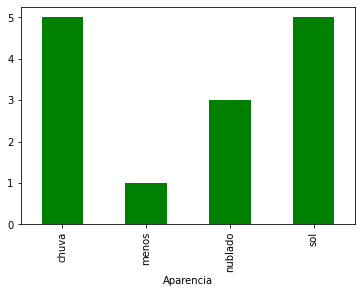

In [60]:
agrupado.plot.bar(color = 'green')
plt.show()

In [61]:
#tirando o valor menos e adicionando em nublado
dados.loc[dados['Aparencia'] ==  'menos', 'Aparencia'] = "nublado"
agrupado = dados.groupby(['Aparencia']).size()
agrupado

Aparencia
chuva      5
nublado    4
sol        5
dtype: int64

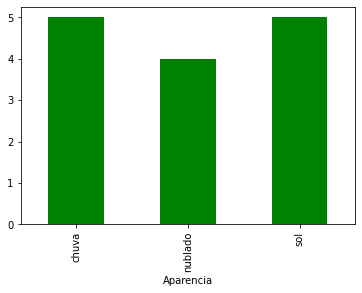

In [62]:
agrupado.plot.bar(color = 'green')
plt.show()

In [63]:
dados['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

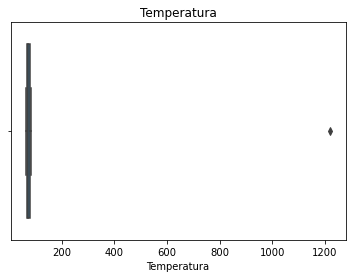

In [64]:
srn.boxplot(dados['Temperatura']).set_title('Temperatura')

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Temperatura')

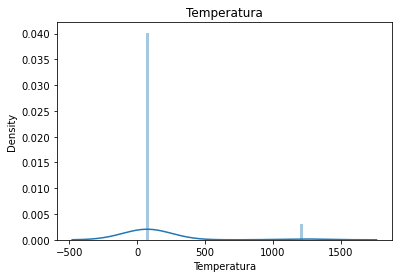

In [65]:
srn.distplot(dados['Temperatura']).set_title('Temperatura')

In [66]:
# A temperatura tem que ficar entre -130 a 130
dados.loc[(dados['Temperatura'] <=-130   )  | ( dados['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [67]:
#calular a mediana
mediana = sts.median(dados['Temperatura'])
mediana

73.5

In [68]:
#substituir
dados.loc[(dados['Temperatura'] <=-130 )  | ( dados['Temperatura'] >  130), 'Temperatura'] = mediana

In [69]:
dados.loc[(dados['Temperatura'] <=-130   )  | ( dados['Temperatura'] >  130) ]

,Aparencia,Temperatura,Umidade,Vento,Jogar


C:\Users\guilh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Temperatura')

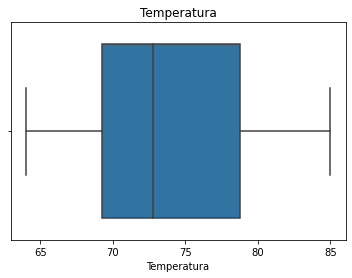

In [70]:
srn.boxplot(dados['Temperatura']).set_title('Temperatura')

In [71]:
dados['Umidade'].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [72]:
dados['Umidade'].isnull().sum()

1

In [73]:
#Calculamos a mediana de Umidade
mediana = sts.median(dados['Umidade'])
mediana

85.5

In [74]:
#substituir NAN por mediana
dados['Umidade'].fillna(mediana, inplace=True)
dados['Umidade'].isnull().sum()

0

In [75]:
#substituir
dados.loc[(dados['Umidade'] <0 )  | ( dados['Umidade'] >  100), 'Umidade'] = mediana

C:\Users\guilh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Umidade')

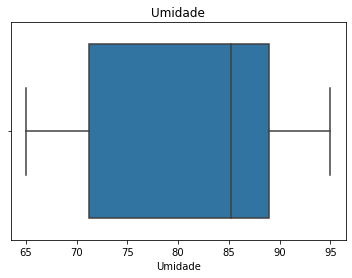

In [76]:
srn.boxplot(dados['Umidade']).set_title('Umidade')

In [77]:
dados['Umidade'].describe()

count    14.000000
mean     81.285714
std       9.585073
min      65.000000
25%      71.250000
50%      85.250000
75%      89.000000
max      95.000000
Name: Umidade, dtype: float64

In [78]:
agrupado = dados.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [79]:
dados['Vento'].isnull().sum()

1

In [80]:
#Substituir NANs por verdadeiro
dados['Vento'].fillna('VERDADEIRO', inplace=True)

In [81]:
dados['Vento'].isnull().sum()

0

In [82]:
agrupado = dados.groupby(['Vento']).size()
agrupado

Vento
FALSO         7
VERDADEIRO    7
dtype: int64

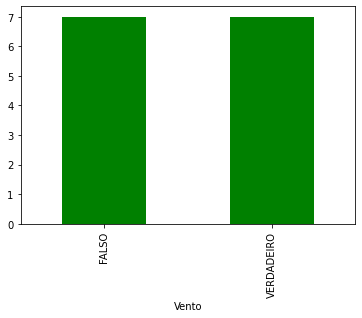

In [83]:
agrupado.plot.bar(color = 'green')
plt.show()

In [84]:
agrupado = dados.groupby(['Jogar']).size()
agrupado

Jogar
nao    5
sim    9
dtype: int64

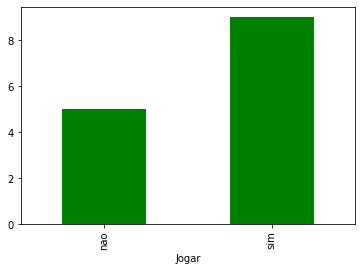

In [85]:
agrupado.plot.bar(color = 'green')
plt.show()